# Download Data from NanoAvionics

The final notebook to be used to download the LIght-1 data from the NanoAvionics server. The rest of the notebooks in this directory are used for development

In [1]:
# Import libraries
import raadpy as rp
import matplotlib.pyplot as plt

In [2]:
# Download the data packet specifying the timestamps
metadata = rp.download_data_packet(
    start    = '2022-09-19T00:00:00',
    end      = '2022-10-25T06:30:00',
    filepath ='../../Data/Light-1/')

print(metadata)

Current File:  https://light1.mcs.nanoavionics.com/pc_buff3_download?archived_ts=gte.2022-09-19T00:00:00&archived_ts=lt.2022-10-25T06:30:00 
Entries Downloaded: 15000 
Last Sequence Number: 698737 
Iterations: 3
Bytes per entry:  [5]


KeyboardInterrupt: 

In [8]:
BUFF    = 1
URL     = f"https://light1.mcs.nanoavionics.com/pc_buff{BUFF}_download?archived_ts=gte.2022-09-19T00:00:00&archived_ts=lt.2022-10-25T06:30:00"
data    = rp.download_range(URL,rp.TOKEN,VERBOSE=True)

Current File:  https://light1.mcs.nanoavionics.com/pc_buff1_download?archived_ts=gte.2022-09-19T00:00:00&archived_ts=lt.2022-10-25T06:30:00 
Entries Downloaded: 5000 
Last Sequence Number: 256719 
Iterations: 1
Bytes per entry:  [5]


In [9]:
# for d in data: print(d)
seq     = [d['seq_nr'] for d in data]
entry   = [d['entry_nr'] for d in data]
time    = [rp.Time(d['archived_ts'],format='isot').to_value('unix') for d in data]

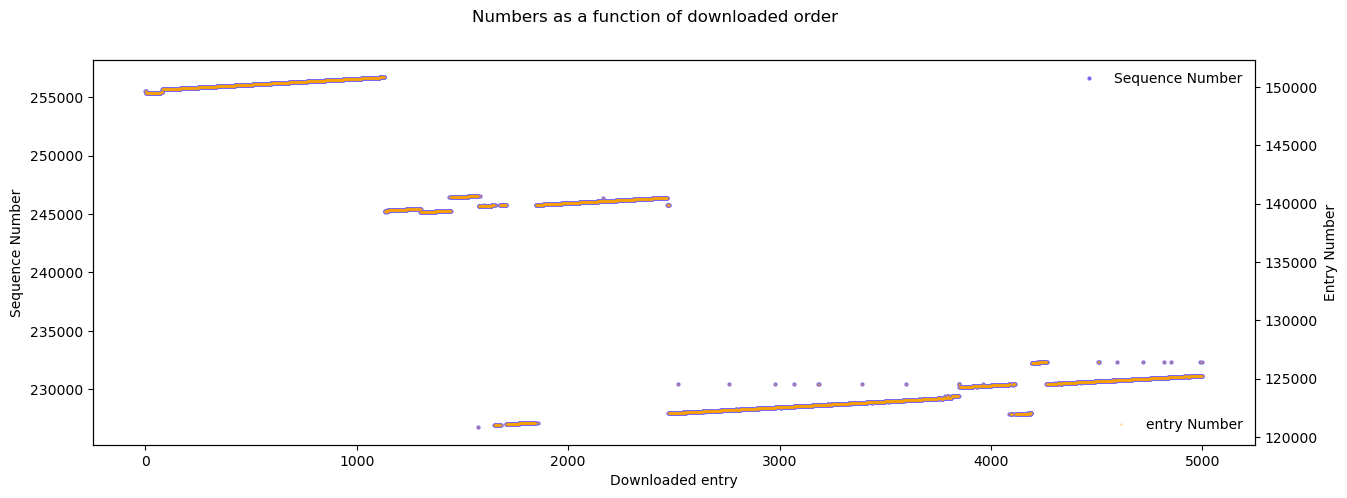

In [16]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_xlabel('Downloaded entry')
ax1.set_ylabel('Sequence Number')
ax2.set_ylabel('Entry Number')
# ax1.set_xlim(0,len(seq))

ax2.plot(entry,'o-',c='orange',lw=0,ms=0.3,label='entry Number')
ax1.plot(seq,'o-',c='mediumslateblue',lw=0,ms=2,label='Sequence Number')
fig.suptitle("Numbers as a function of downloaded order")
ax1.legend(frameon=False)
ax2.legend(frameon=False,loc='lower right')

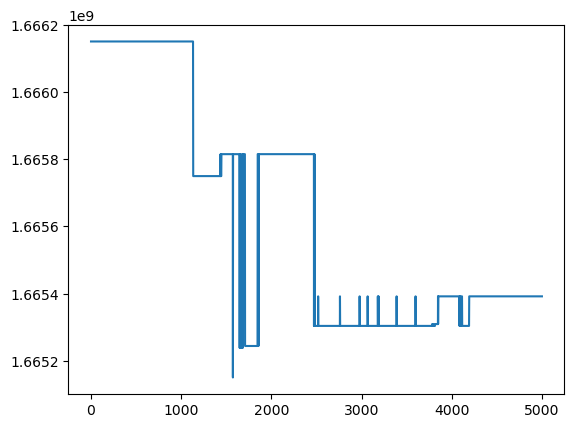

In [11]:
plt.plot(time)

In [6]:

BUFF    = 1
URL     = f"https://light1.mcs.nanoavionics.com/pc_buff{BUFF}_download?"
fdata   = rp.download_range(URL,rp.TOKEN,VERBOSE=True,limit=10000)

Current File:  https://light1.mcs.nanoavionics.com/pc_buff1_download? 
Entries Downloaded: 60000 
Last Sequence Number: 256553 
Iterations: 6
Bytes per entry:  [5]


In [7]:
len(fdata)

60166